<a href="https://colab.research.google.com/github/joaomarcosmb/ml-ufc/blob/main/lista-01/Lista01_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1

In [150]:
X_original, y_original = np.loadtxt('artificial1d.csv', delimiter=',', skiprows=1, unpack=True)
print(X_original)

[-0.93103448 -0.86206897 -0.79310345 -0.72413793 -0.65517241 -0.5862069
 -0.51724138 -0.44827586 -0.37931034 -0.31034483 -0.24137931 -0.17241379
 -0.10344828 -0.03448276  0.03448276  0.10344828  0.17241379  0.24137931
  0.31034483  0.37931034  0.44827586  0.51724138  0.5862069   0.65517241
  0.72413793  0.79310345  0.86206897  0.93103448  1.        ]


## Item A

O modelo de regressão linear é dado por
$$\hat{\boldsymbol{y}} = f(x) = w_0 + w_1x,$$

Onde
* $w_0$ é o viés (intercepto);
* e $w_1$ é o coeficiente/peso associado $x$.

O dataset apresenta pares numéricos $(x_{i}, y_{i})$. O item a pede os parâmetros do modelo, isto é, $w_0$ e $w_1$, calculados a partir do método OLS (Ordinary Least Squares).

No formato matricial, pode-se escrever a predição para todas as amostras como
$$\hat{\boldsymbol{y}} = \boldsymbol{X}\boldsymbol{w},$$

Tal que
* $\mathbf{X}$ é a matriz de entrada (inclui uma coluna de uns para o intercepto);
* $\mathbf{w}$ é o vetor de parâmetros.

No OLS, assume‑se que $\boldsymbol{X}^{\top}\boldsymbol{X}$ é inversível e a solução analítica que minimiza a função de custo é dado por:
$$\hat{\boldsymbol{w}} = (\boldsymbol{X}^{\top}\boldsymbol{X})^{-1} \boldsymbol{X}^{\top}\boldsymbol{y}.$$

OBS: $(\boldsymbol{X}^{\top}\boldsymbol{X})^{-1} \boldsymbol{X}^{\top}$ é a pseudo-inversa (Moore-Penrose).

In [151]:
# Cria coluna de 1s para o intercepto w_0
ones_matrix = np.ones((X_original.shape[0], 1))
# Concatena ones_matrix com X
X_with_bias = np.c_[ones_matrix, X_original]

In [152]:
def fit_ols(X, y):
  return np.linalg.pinv(X) @ y

In [153]:
w_hat = fit_ols(X_with_bias, y_original)

w_0, w_1 = w_hat[0], w_hat[1]
print(f"w_0 (intercepto/viés) = {w_0:.6f}")
print(f"w_1 (peso) = {w_1:.6f}")

w_0 (intercepto/viés) = 0.089561
w_1 (peso) = 1.513283


Para o cáclulo do MSE (Mean Squared Error), temos:
$$\mathrm{MSE} = \frac{1}{n}\sum_i^n (\boldsymbol{y} - \hat{\boldsymbol{y}})^2$$

In [154]:
def calc_mse(X, y, y_hat):
  y = y.reshape(-1, 1)              # Garante (N,1)
  y_hat = y_hat.reshape(-1, 1)      # Garante (N,1)
  N = X.shape[0]
  return 1 / N * ((y - y_hat) ** 2).sum(axis=None)

In [155]:
y_hat = X_with_bias @ w_hat
mse = calc_mse(X_with_bias, y_original, y_hat)
print(f"MSE = {mse:.6f}")

MSE = 0.207712


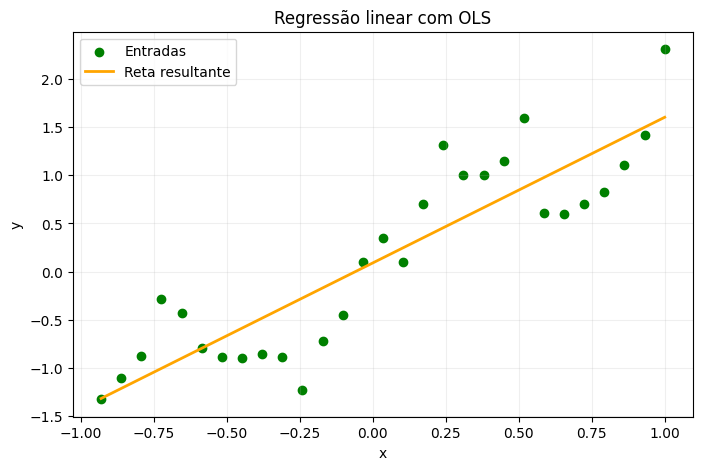

In [156]:
plt.figure(figsize=(8, 5))
plt.scatter(X_with_bias[:, 1], y_original, color='green', label='Entradas')
plt.plot(X_with_bias[:, 1], y_hat, color='orange', linewidth=2, label='Reta resultante')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão linear com OLS')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

## Item B

De acordo com o algoritmo de gradiente descendente (GD), os parâmetros $\boldsymbol{w}$ podem ser atualizados da seguinte forma:
$$\boldsymbol{w}(t) = \boldsymbol{w}(t-1) + \alpha \frac{1}{N}\sum_{i=1}^{N} e_i(t-1) \boldsymbol{x}_i,$$

Onde
* $t$ é a iteração atual do algoritmo;
* $\alpha$ é o passo de aprendizagem;
* $N$ o número de observações disponíveis;
* e $e_i(t-1) = y_i - \boldsymbol{w}^{\top}(t-1)\boldsymbol{x}_i$.

In [157]:
def fit_gd(X, y, alpha=0.01, n_epochs=2000):
  y_col = y.reshape(-1, 1)           # Garante (N,1), pois y_original é (N,)

  w = np.zeros((X.shape[1], 1))      # (2,1)

  N = X.shape[0]

  for i in range(n_epochs):
    # Cálculo das predições
    y_hat = X @ w                    # (N,1)

    # Atualização do erro
    e = y_col - y_hat                # (N,1)

    # Cálculo do gradiente
    grad = (X.T @ e) / N             # (2,1)

    # Atualização dos pesos
    w = w + alpha * grad

  return w

In [158]:
w_gd = fit_gd(X_with_bias, y_original)  # (2,1)

# .ravel() convert de (N, 1) p/ (N,)
w_0_gd, w_1_gd = w_gd.ravel().tolist()            # Achata o array e transforma em uma lista
print(f"w_0 (intercepto/viés) = {w_0_gd:.6f}")
print(f"w_1 (peso) = {w_1_gd:.6f}")

w_0 (intercepto/viés) = 0.089661
w_1 (peso) = 1.511351


In [159]:
y_hat_gd = X_with_bias @ w_gd

mse_gd = calc_mse(X_with_bias, y_original, y_hat_gd)
print(f"MSE = {mse_gd:.6f}")

MSE = 0.207714


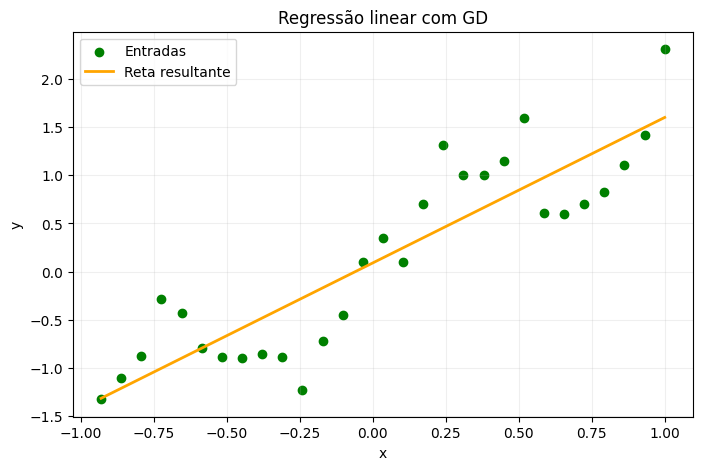

In [160]:
plt.figure(figsize=(8, 5))
plt.scatter(X_with_bias[:, 1], y_original, color='green', label='Entradas')
plt.plot(X_with_bias[:, 1], y_hat_gd, color='orange', linewidth=2, label='Reta resultante')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão linear com GD')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

## Item C

Segundo o algoritmo de SGD, os parâmetros $\boldsymbol{w}$ podem ser atualizados via algoritmo SGD:

$$\boldsymbol{w}(t) = \boldsymbol{w}(t-1) + \alpha e_i(t-1) \boldsymbol{x}_i,$$

Onde
$$e_i(t-1) = y_i - \boldsymbol{w}^{\top}(t-1)\boldsymbol{x}_i.$$


In [161]:
def fit_sgd(X, y, alpha=0.01, n_epochs=2000, seed=42):
  # Cria uma instância da classe Generator (para gerar números aleatórios)
  rng = np.random.default_rng(seed)  # seed determina reprodutibilidade

  N = X.shape[0]

  w = np.zeros((X.shape[1], 1))

  for _ in range(n_epochs):
    # Embaralha os índices a cada época
    idx = rng.permutation(N)                # Array de índices permutados

    for i in idx:
      # Seleciona uma amostra
      xi = X[i:i+1].T                       # (N, 1)
      yi = y[i:i+1]                         # (1, 1)

      # Cálculo da predição para esta amostra
      y_hat_i = w.T @ xi                    # (1, 1)

      # Cálculo do erro da amostra
      ei = yi - y_hat_i                     # (1, 1)

      grad = xi * ei                        # (N, 1)

      # Atualização do SGD
      w = w + alpha * grad

  return w

In [162]:
w_sgd = fit_sgd(X_with_bias, y_original)

w_0_sgd, w_1_sgd = w_sgd.ravel().tolist()
print(f"w_0 (intercepto/viés) = {w_0_sgd:.6f}")
print(f"w_1 (peso) = {w_1_sgd:.6f}")

w_0 (intercepto/viés) = 0.086885
w_1 (peso) = 1.512404


In [163]:
y_hat_sgd = X_with_bias @ w_sgd

mse_sgd = calc_mse(X_with_bias, y_original, y_hat_sgd)
print(f"MSE = {mse_sgd:.6f}")

MSE = 0.207720


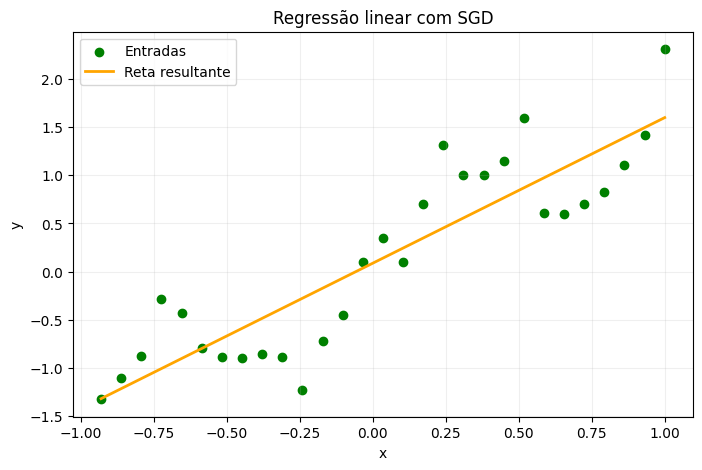

In [164]:
plt.figure(figsize=(8, 5))
plt.scatter(X_with_bias[:, 1], y_original, color='green', label='Entradas')
plt.plot(X_with_bias[:, 1], y_hat_sgd, color='orange', linewidth=2, label='Reta resultante')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão linear com SGD')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# Questão 2

In [165]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [166]:
dataset_california = np.loadtxt('california.csv', delimiter=',')
print(dataset_california)

[[   4.1685       20.            6.70063694 ...   38.8
  -121.15          2.175     ]
 [   2.8194       24.            4.7625     ...   36.75
  -119.85          0.811     ]
 [   2.425        46.            4.92771084 ...   36.33
  -119.31          0.849     ]
 ...
 [   4.7308       35.            5.66666667 ...   33.83
  -118.37          3.534     ]
 [   4.2788       10.            5.375      ...   33.68
  -117.35          1.25      ]
 [   2.8036       18.            3.27400881 ...   34.1
  -118.35          2.25      ]]


In [167]:
X_original = dataset_california[:, :-1] # Seleciona as 8 primeiras colunas
y_original = dataset_california[:, -1]  # Seleciona a última coluna

## Item A

Para fazer uma divisão aleatória de treino/teste manualmente,

1.   os índices dos elementos de cada vetor serão permutados,
2.   e depois serão selecionados de acordo com a proporção indicada.



In [168]:
def train_test_split(X, y, test_size=0.2, random_state=42):
  if random_state is not None:
    np.random.seed(random_state)

  N_samples = X.shape[0]
  N_test = int(N_samples * test_size)

  # Permuta aleatoriamente os índices
  idxs = np.random.permutation(N_samples)

  # Separa os índices de treino e teste
  test_idxs = idxs[:N_test]
  train_idxs = idxs[N_test:]

  return X[train_idxs], y[train_idxs], X[test_idxs], y[test_idxs]

In [169]:
X_train, y_train, X_test, y_test = train_test_split(X_original, y_original)

É necessário regularizar as entradas usando o método MinMax, de forma que:
$$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}},$$

Onde
* $X$ representa o valor original da feature a ser normalizada (ou vetor, quando $\textbf{X}$);
* $X_{\text{min}}$ é o valor mínimo observado naquela feature no conjunto de dados;
* e $X_{\text{max}}$ é o valor máximo observado naquela feature no conjunto de dados.

Observações:
- É sensível a outliers, pois depende dos extremos.
- Para desnormalizar, $X = X_{\text{scaled}} \times (X_{\text{max}} - X_{\text{min}}) + X_{\text{min}}.$

In [170]:
inputScaler = MinMaxScaler()
X_train_scaled = inputScaler.fit_transform(X_train)
X_test_scaled = inputScaler.transform(X_test)

Já as saídas devem ser regularizadas utilizando o `StandardScaler`. Ele corresponde à normalização com z-score, tornando a distribuição em uma gaussiana.

$$z = \frac{X - \mu}{\sigma},$$

Onde:
* $X$ é o valor original da feature;
* $\mu$ é a média dos valores;
* e $\sigma$ é o desvio padrão.

Observações:
- É sensível a outliers, mas menos que o MinMax.
- Para desnormalizar, $X = z \times \sigma + \mu.$

In [171]:
output_scaler = StandardScaler()
y_train_scaled = output_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = output_scaler.transform(y_test.reshape(-1, 1))

## Itens B, C e D

In [172]:
max_degree = 13
degrees = range(1, 14)

Para a regularização L2 (ridge), pode-se adotar a solução analítica do OLS:
$$\boldsymbol{w} = (\boldsymbol{X}^\mathsf{T}\boldsymbol{X}+\lambda\boldsymbol{I})^{-1}\boldsymbol{X}^\mathsf{T}\boldsymbol{y},$$

OBS:
* $\lambda > 0$ é um hiperparâmetro de regularização;
* E o parâmetro $w_0$ (viés) não é regularizado.

In [173]:
def solve_ridge_ols(X, y, lmbda=0.0):
    N, D = X.shape

    # Garante formato correto
    if y.ndim == 1:
        y = y.reshape(-1, 1)

    # Matriz de regularização (não regulariza o viés w0)
    I = np.eye(D)
    I[0, 0] = 0  # w0 não é regularizado

    # Solução analítica
    w = np.linalg.inv(X.T @ X + lmbda * I) @ X.T @ y

    return w

Aqui, buscando evitar explosão de memória, os termos cruzados presentes na expansão completa dos polinômios serão desconsiderados. Somente os termos polinomiais individuais de cada variável (potências) serão mantidos.

Nesse sentido, o número total de termos de todos os polinômios é dado por $\sum_{i=1}^{P}(D \times i + 1) = \sum_{i=1}^{13}(8 \times i + 1) = 741$ termos.

In [174]:
import itertools

In [175]:
# Gera features polinomiais sem termos cruzados.
def build_polynomial_features_up_to_degree(X, degree):
  N, D = X.shape

  # Termo de viés
  features = [np.ones((N, 1))]

  for d in range(1, degree + 1):
    features.append(np.power(X, d))

  # Concatena todas as colunas resultantes
  return np.hstack(features)

In [176]:
def train_polynomial_model(X_train, y_train, X_test, y_test, max_degree=13,
                           alpha=0.01, lmbda=0.0, nbatch_size=32):
  rmse_train_list = []
  rmse_test_list = []

  for degree in range(1, max_degree + 1):
    X_train_poly = build_polynomial_features_up_to_degree(X_train, degree)
    X_test_poly = build_polynomial_features_up_to_degree(X_test, degree)

    # Realiza o treino
    w = solve_ridge_ols(X_train_poly, y_train, lmbda=lmbda)

    # Realiza as predições
    y_hat_train = X_train_poly @ w
    y_hat_test = X_test_poly @ w

    # Desnormaliza as saídas
    y_hat_train_original = output_scaler.inverse_transform(y_hat_train.reshape(-1, 1)).ravel()
    y_hat_test_original = output_scaler.inverse_transform(y_hat_test.reshape(-1, 1)).ravel()
    y_train_original = output_scaler.inverse_transform(y_train.reshape(-1, 1)).ravel()
    y_test_original = output_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calcula RMSE
    rmse_train = np.sqrt(calc_mse(X_train_poly, y_train_original, y_hat_train_original))
    rmse_test = np.sqrt(calc_mse(X_test_poly, y_test_original, y_hat_test_original))

    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)

  return rmse_train_list, rmse_test_list

In [177]:
rmse_train_list, rmse_test_list = train_polynomial_model(
    X_train_scaled,
    y_train_scaled,
    X_test_scaled,
    y_test_scaled
)
rmse_train_ridge_list, rmse_test_ridge_list = train_polynomial_model(
    X_train_scaled,
    y_train_scaled,
    X_test_scaled,
    y_test_scaled,
    lmbda=0.01
)

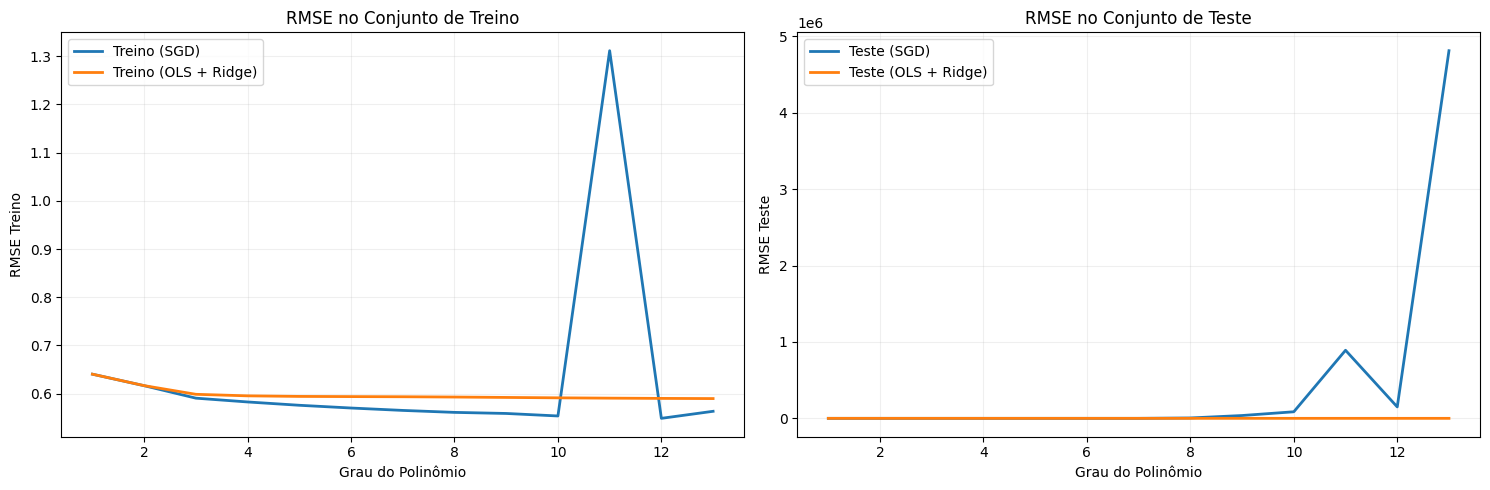

In [178]:
plt.figure(figsize=(15, 5))

# Gráfico de treino
plt.subplot(1, 2, 1)
plt.plot(degrees, rmse_train_list, linewidth=2, label='Treino (SGD)')
plt.plot(degrees, rmse_train_ridge_list, linewidth=2, label='Treino (OLS + Ridge)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE Treino')
plt.title('RMSE no Conjunto de Treino')
plt.legend()
plt.grid(True, alpha=0.2)

# Gráfico de teste
plt.subplot(1, 2, 2)
plt.plot(degrees, rmse_test_list, linewidth=2, label='Teste (SGD)')
plt.plot(degrees, rmse_test_ridge_list, linewidth=2, label='Teste (OLS + Ridge)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE Teste')
plt.title('RMSE no Conjunto de Teste')
plt.legend()
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()